<a href="https://colab.research.google.com/github/RakshithaK2001/Brain_Tumor_Detection/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [ ]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

OneHotEncoder()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = []
paths = []
result = []
for r, d, f in os.walk(r'/content/drive/MyDrive/Internship/archive/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    
    if(img.shape == (128,128,3)):
        data.append(img)
        result.append(encoder.transform([[0]]).toarray())



In [ ]:
paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/Internship/archive/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())


In [ ]:
data = np.array(data)

data.shape

(139, 128, 128, 3)

In [ ]:
result = np.array(result)
result = result.reshape(139,2)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)


In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))


In [ ]:
model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [ ]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 12s 571ms/step - loss: 16.6138 - val_loss: 16.9209
Epoch 2/30
3/3 [==============================] - 0s 64ms/step - loss: 13.8942 - val_loss: 81.9263
Epoch 3/30
3/3 [==============================] - 0s 60ms/step - loss: 12.1639 - val_loss: 21.5257
Epoch 4/30
3/3 [==============================] - 0s 62ms/step - loss: 10.6098 - val_loss: 15.8129
Epoch 5/30
3/3 [==============================] - 0s 61ms/step - loss: 1.5911 - val_loss: 39.2043
Epoch 6/30
3/3 [==============================] - 0s 60ms/step - loss: 3.6522 - val_loss: 43.1836
Epoch 7/30
3/3 [==============================] - 0s 59ms/step - loss: 3.0799 - val_loss: 27.0563
Epoch 8/30
3/3 [==============================] - 0s 61ms/step - loss: 1.1407 - val_loss: 11.7334
Epoch 9/30
3/3 [==============================] - 0s 60ms/step - loss: 0.3560 - val_loss: 6.1764
Epoch 10/30
3/3 [==============================] - 0s 66ms/step - loss: 0.6316 - val_loss: 7.1617
Epoch 11/30
3/3

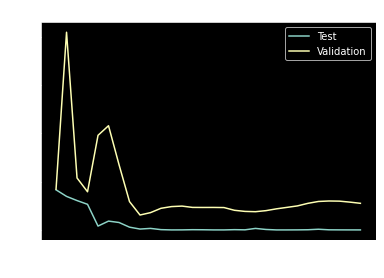

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()


In [ ]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is No, Its not a tumor


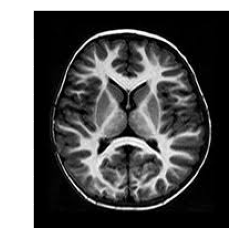

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/Internship/archive/no/14 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is A Its a Tumor


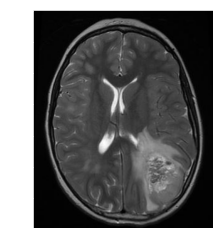

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r'/content/drive/MyDrive/Internship/archive/yes/Y100.JPG')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

In [ ]:
import joblib
joblib.dump(model,'tumor_detection')

INFO:tensorflow:Assets written to: ram://0ad039cb-9a8b-42ee-802a-c54e847b716a/assets


['tumor_detection']

In [ ]:
import cv2
image_file=cv2.imread(r'/content/drive/MyDrive/Internship/archive/yes/Y10.jpg')
from google.colab.patches import cv2_imshow
im=Image.fromarray(image_file)

In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 19.1 MB/s 
     |████████████████████████████████| 111 kB 66.4 MB/s 
     |████████████████████████████████| 181 kB 67.3 MB/s 
     |████████████████████████████████| 164 kB 70.9 MB/s 
     |████████████████████████████████| 4.3 MB 71.0 MB/s 
     |████████████████████████████████| 77 kB 8.4 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 131 kB 78.2 MB/s 
     |████████████████████████████████| 428 kB 68.5 MB/s 
     |████████████████████████████████| 793 kB 62.5 MB/s 
     |████████████████████████████████| 130 kB 58.2 MB/s 
     |████████████████████████████████| 381 kB 67.3 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=2ee75e836759d1dd6ad400ae73c226a6cf075660dbc652b1ff45694b72ab02f9
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df

In [ ]:
!pip install streamlit-option-menu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 712 kB 19.5 MB/s 


In [ ]:
%%writefile app.py
import streamlit as st
from streamlit_option_menu import option_menu
import numpy as np
import joblib
import cv2
from PIL import Image
from matplotlib.pyplot import imshow
import warnings
import pandas as pd
import plotly.express as px
warnings.filterwarnings(action='ignore')
model=joblib.load('tumor_detection')

with st.sidebar:
  selected=option_menu(
      menu_title='Main_Menu',
      options=['Home','Upload']
  )
if selected=='Home':
  st.title('Tumor Detector')
  st.subheader("This is an app which detects Brain Tumor")
  st.image(r"/content/drive/MyDrive/Internship/Homepage.webp",width=800)
flag=0
classification=0
if selected=='Upload':
  st.title("YOU CAN UPLOAD THE IMAGE HERE")
  st.image(r"/content/drive/MyDrive/Internship/UploadImage.webp")
  image_file = st.file_uploader("Upload Images", type=["jpg"])
  flag=1
  try:
    img = Image.open(image_file)
    st.image(img)
    x = np.array(img.resize((128,128)))
    x = x.reshape(1,128,128,3)
    res = model.predict(x)
    confidence=res[0][classification]*100
    classification = np.where(res == np.amax(res))[1][0]
    data={'Tumor':['Not_present','present'],'confidence':[0,0]}
    df=pd.DataFrame(data)
    if classification==1:
      df.iloc[1,[1]] = confidence
      df.iloc[0,[1]] = 100-confidence
      bar_chart=px.bar()
      st.subheader('No tumor detected')
      st.write('The model prediction along with the confidence is plotted below')
      fig = px.bar(df, x='Tumor', y='confidence')
      st.plotly_chart(fig)
    else:
      df.iloc[1,[1]] = confidence
      df.iloc[0,[1]] = 100-confidence
      st.subheader('Tumor detected')
      st.write('The model prediction along with the confidence is plotted below')
      bar_chart=px.bar()
      fig = px.bar(df, x='Tumor', y='confidence')
      st.plotly_chart(fig)
  except:
    print("error")

Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

2022-05-24 08:56:34.435 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.86.82.164:8501

npx: installed 22 in 2.67s
your url is: https://rare-clubs-film-34-86-82-164.loca.lt
2022-05-24 08:58:38.798219: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
error
  Stopping...
^C
